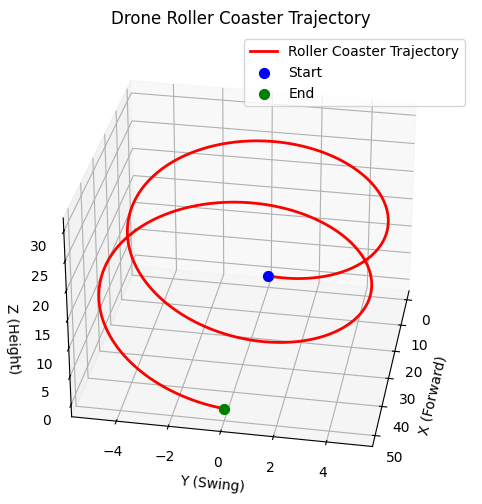

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

num_loops = 2 
track_length = 50
height = 15  
num_points = 300  

t_values = np.linspace(0, track_length, num_points)

px_values = t_values 
py_values = 5 * np.sin(2 * np.pi * num_loops * t_values / track_length)  
pz_values = height * (1 - np.cos(2 * np.pi * num_loops * t_values / track_length))  

vx_values = np.gradient(px_values) / np.gradient(t_values)
vy_values = np.gradient(py_values) / np.gradient(t_values)
vz_values = np.gradient(pz_values) / np.gradient(t_values)


yaw_values = np.zeros(num_points)  
mode_values = np.full(num_points, 70) 

df = pd.DataFrame({
    "idx": range(num_points),
    "t": t_values,
    "px": px_values,
    "py": py_values,
    "pz": -pz_values,  
    "vx": vx_values,
    "vy": vy_values,
    "vz": vz_values,
    "ax": np.zeros(num_points),  
    "ay": np.zeros(num_points),
    "az": np.zeros(num_points),
    "yaw": yaw_values,
    "mode": mode_values
})

csv_filename = "/Users/jiyuwei/PycharmProjects/FYP_Python/movements/roller_coaster_shape/roller_coaster_trajectory.csv"
df.to_csv(csv_filename, index=False)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")

ax.plot(px_values, py_values, pz_values, color="red", linewidth=2, label="Roller Coaster Trajectory")

ax.scatter(px_values[0], py_values[0], pz_values[0], color="blue", s=50, label="Start")
ax.scatter(px_values[-1], py_values[-1], pz_values[-1], color="green", s=50, label="End")

ax.set_xlabel("X (Forward)")
ax.set_ylabel("Y (Swing)")
ax.set_zlabel("Z (Height)")
ax.set_title("Drone Roller Coaster Trajectory")

ax.view_init(azim=10)  

ax.legend()

plt.show()

csv_filename
